In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt


In [2]:
# Sentiment analysis function
def sentimentAnalyzer(text):
    blob = TextBlob(text)
    score = blob.sentiment.polarity
    if score < -0.2:
        return 'Negative'
    elif score <= 0.2:
        return 'Neutral'
    else:
        return 'Positive'


In [3]:
# Test the sentiment analyzer
test_words = {
    'happy': 'Positive', 'exciting': 'Positive', 'good': 'Positive', 'rich': 'Positive', 'smile': 'Positive',
    'sad': 'Negative', 'disappointed': 'Negative', 'bad': 'Negative', 'poor': 'Negative', 'anger': 'Negative',
    'food': 'Neutral', 'animal': 'Neutral'
}

for word, expected_sentiment in test_words.items():
    result = sentimentAnalyzer(word)
    print(f"Word: {word}, Expected Sentiment: {expected_sentiment}, Result: {result}")


Word: happy, Expected Sentiment: Positive, Result: Positive
Word: exciting, Expected Sentiment: Positive, Result: Positive
Word: good, Expected Sentiment: Positive, Result: Positive
Word: rich, Expected Sentiment: Positive, Result: Positive
Word: smile, Expected Sentiment: Positive, Result: Positive
Word: sad, Expected Sentiment: Negative, Result: Negative
Word: disappointed, Expected Sentiment: Negative, Result: Negative
Word: bad, Expected Sentiment: Negative, Result: Negative
Word: poor, Expected Sentiment: Negative, Result: Negative
Word: anger, Expected Sentiment: Negative, Result: Negative
Word: food, Expected Sentiment: Neutral, Result: Neutral
Word: animal, Expected Sentiment: Neutral, Result: Neutral


In [4]:
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')

# Display available products and their review counts
product_counts = df['Product Name'].value_counts()
print(product_counts)


Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)                                    1451
Apple MF259LL/A - iPhone 4s 8GB / 8MP Camera - Unlocked - Black (Certified Refurbished)                                 1241
BLU Studio 5.0 C HD Unlocked Cellphone, Black                                                                           1194
OtterBox Iphone 5/5S/SE Defender Case w/ Drop and Dust Proctection - Realtree AP Pink                                   1129
Motorola Moto E (1st Generation) - Black - 4 GB - Global GSM Unlocked Phone                                             1127
                                                                                                                        ... 
Samsung Galaxy express Prime Unlocked 4G LTE J320A 16GB Quad Core LCD 5" Android 6.0 Desbloqueado                          1
Samsung Galaxy J1 Ace J111M 8GB Unlocked GSM Quad-Core Android LolliPop Smartphone - Black (International Version)         1


In [5]:
# Drop rows with missing values in the 'Reviews' column
df = df.dropna(subset=['Reviews'])

# Select Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished) for analysis
product_name = 'Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)'
filtered_df = df[df['Product Name'] == product_name]

if filtered_df.empty:
    print(f"No reviews found for the product {product_name}")
else:
    # Data description
    num_rows = len(filtered_df)
    num_cols = filtered_df.shape[1]
    review_lengths = filtered_df['Reviews'].apply(len)
    min_length = review_lengths.min()
    max_length = review_lengths.max()
    avg_length = review_lengths.mean()

    print(f"Product Name: {product_name}")
    print(f"Number of Rows: {num_rows}")
    print(f"Number of Columns: {num_cols}")
    print(f"Length of the Shortest Review: {min_length}")
    print(f"Length of the Longest Review: {max_length}")
    print(f"Average Length of Reviews: {avg_length:.2f}")


Product Name: Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)
Number of Rows: 1448
Number of Columns: 6
Length of the Shortest Review: 1
Length of the Longest Review: 1465
Average Length of Reviews: 107.60


In [6]:
# Sentiment Analysis applied to the filtered data
if not filtered_df.empty:
    filtered_df['Sentiment'] = filtered_df['Reviews'].apply(sentimentAnalyzer)


/var/folders/t9/szcm0qvn2z17fcycb2cf863m0000gn/T/ipykernel_5507/2367116964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Sentiment'] = filtered_df['Reviews'].apply(sentimentAnalyzer)


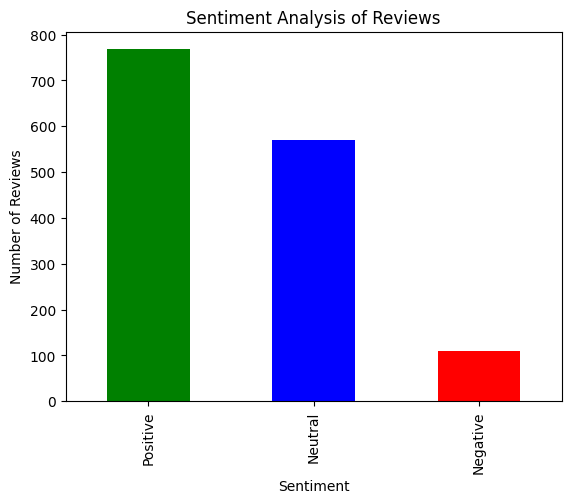

Positive    768
Neutral     570
Negative    110
Name: Sentiment, dtype: int64
Sentiment: Positive, Review: good buy, Polarity: 0.7
Sentiment: Negative, Review: Bad batery, Polarity: -0.6999999999999998
Sentiment: Neutral, Review: I bought and send to Africa the two are not working, Polarity: 0.0
Total Negative Reviews: 110
Total Positive Reviews: 768
Total Neutral Reviews: 570
Review: The Battery is not lasting for more than two hours, Rating: 1, Sentiment: Positive
Polarity: 0.25
Review: It is not unlocked, i love my virgin mobile iphone and it took a dive the last week so i got this as a replacement because in the details it said it was both gms and cdmc compatible. It is locked into verizon and i now have to spend more money on a prepaid contract that doesnt even work for me which is a big strain on my budget. Cant afford to return and can't wait for a new phone, very dissapointed., Rating: 1, Sentiment: Positive
Polarity: 0.2227272727272727
Review: The information for this item sai

In [7]:
# Visualization and Insights
if not filtered_df.empty:
    # Visualization
    sentiment_counts = filtered_df['Sentiment'].value_counts()
    sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
    plt.title('Sentiment Analysis of Reviews')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Reviews')
    plt.show()

    # Results summary
    print(sentiment_counts)

    # Examples of reviews with different sentiments
    examples = {
        'Positive': filtered_df[filtered_df['Sentiment'] == 'Positive'].iloc[0]['Reviews'],
        'Negative': filtered_df[filtered_df['Sentiment'] == 'Negative'].iloc[0]['Reviews'],
        'Neutral': filtered_df[filtered_df['Sentiment'] == 'Neutral'].iloc[0]['Reviews']
    }
    
    for sentiment, review in examples.items():
        blob = TextBlob(review)
        polarity = blob.sentiment.polarity
        print(f"Sentiment: {sentiment}, Review: {review}, Polarity: {polarity}")

    # Insights for the client
    negative_reviews = filtered_df[filtered_df['Sentiment'] == 'Negative']
    positive_reviews = filtered_df[filtered_df['Sentiment'] == 'Positive']
    neutral_reviews = filtered_df[filtered_df['Sentiment'] == 'Neutral']

    print(f"Total Negative Reviews: {len(negative_reviews)}")
    print(f"Total Positive Reviews: {len(positive_reviews)}")
    print(f"Total Neutral Reviews: {len(neutral_reviews)}")

    # Reviews where TextBlob might have assigned the wrong sentiment
    incorrect_reviews = filtered_df[(filtered_df['Sentiment'] == 'Positive') & (filtered_df['Rating'] <= 2)]
    for index, row in incorrect_reviews.iterrows():
        print(f"Review: {row['Reviews']}, Rating: {row['Rating']}, Sentiment: {row['Sentiment']}")
        print(f"Polarity: {TextBlob(row['Reviews']).sentiment.polarity}")



In [8]:
filtered_df.to_csv('sentiment_analysis_results.csv', index=False)